## GANs and Zeroth-Order Algorithms

In [ ]:
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/log_likelihood.py -q
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/models.py -q
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/plot.py -q
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/train.py -q
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/utils.py -q
#!wget https://raw.githubusercontent.com/severilov/zo/master/code/zo_opt.py -q

0it [00:00, ?it/s]

9920512it [00:05, 1910653.88it/s]                             


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 64781.69it/s]            
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 799284.44it/s]                             
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 20985.21it/s]            


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/Users/Pablo/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/Pablo/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


Device: cpu
Example of train samples:


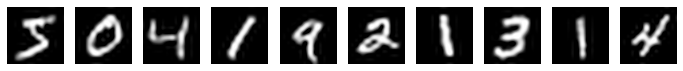

In [3]:
from zo.train import main

In [4]:
lr_values = [2e-5, 1e-4, 2e-4, 2e-3]
tau_values = [2e-6, 1e-6, 1e-5, 1e-4, 1e-3]
batch_size_values = [4, 32, 64, 128, 1024]

In [ ]:
for lr_d in lr_values:
    for lr_g in lr_values:
        for tau in tau_values:
            optD, optG = 'Adam', 'zoVIA'
            gan_adam_zovia, img_list_adam_zovia = main(optD, optG, num_epochs=2,
                                                       discr_zo=False, gener_zo=True, save=True,
                                                       tau=tau, lr_d=lr_d, lr_g=lr_g, batch_size=32,
                                                       change_opt=(-1, -1, 'Adam', 'SGD', 2e-4, 2e-4),
                                                       img_every_epoch=True, log_like=False)

Device: cuda
Discriminator optimizer: Adam, lr=0.0002
Generator optimizer: zoVIA, lr=0.002
Starting Training Loop...
Log-likelihood before training:  1


EPOCH #1
[1/2][0/1875]	Loss_D: 1.4103	Loss_G: 0.6967	D(x): 0.5176	D(G(z)): 0.5119 / 0.5055
[1/2][200/1875]	Loss_D: 1.3616	Loss_G: 0.7237	D(x): 0.5085	D(G(z)): 0.4915 / 0.4877
[1/2][400/1875]	Loss_D: 1.3479	Loss_G: 0.7420	D(x): 0.5084	D(G(z)): 0.4842 / 0.4793
[1/2][600/1875]	Loss_D: 1.2971	Loss_G: 0.7717	D(x): 0.5289	D(G(z)): 0.4752 / 0.4684
[1/2][800/1875]	Loss_D: 1.2565	Loss_G: 0.8104	D(x): 0.5295	D(G(z)): 0.4557 / 0.4499
[1/2][1000/1875]	Loss_D: 1.2208	Loss_G: 0.8478	D(x): 0.5348	D(G(z)): 0.4399 / 0.4327
[1/2][1200/1875]	Loss_D: 1.1710	Loss_G: 0.8919	D(x): 0.5585	D(G(z)): 0.4302 / 0.4208
[1/2][1400/1875]	Loss_D: 1.0536	Loss_G: 0.9567	D(x): 0.5957	D(G(z)): 0.3995 / 0.3922
[1/2][1600/1875]	Loss_D: 1.0456	Loss_G: 0.9562	D(x): 0.6055	D(G(z)): 0.4061 / 0.3981
[1/2][1800/1875]	Loss_D: 0.9204	Loss_G: 1.0702	D(x): 0.6450	D(G(z)): 0.3668 / 0

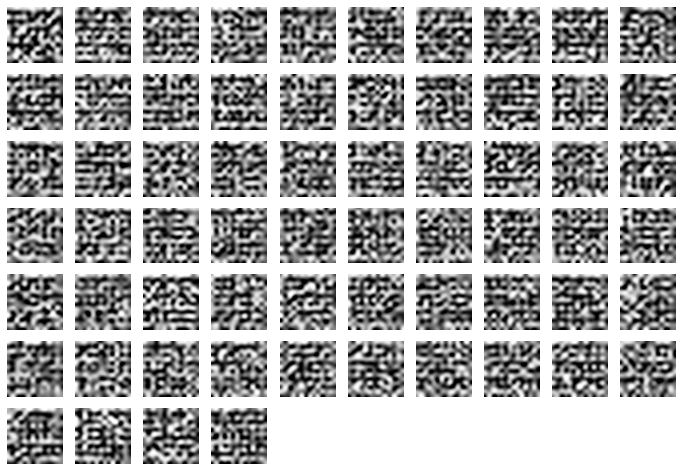

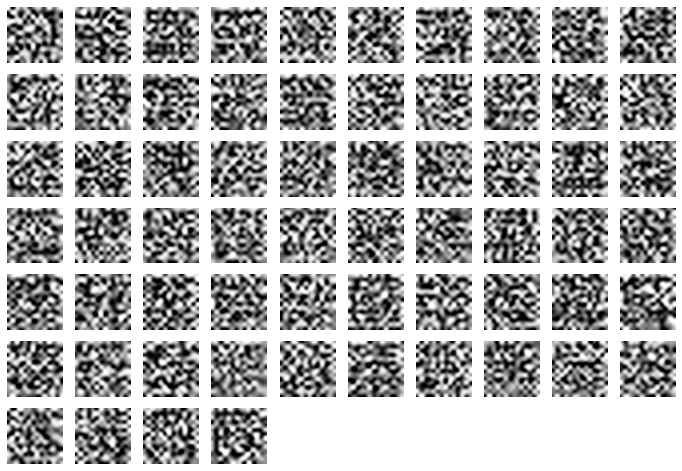

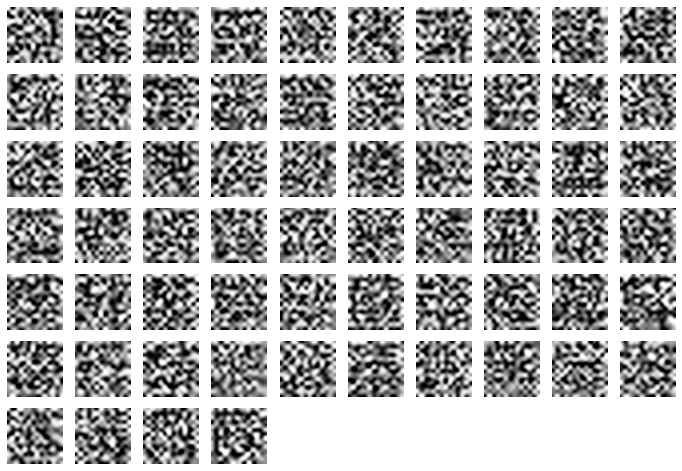

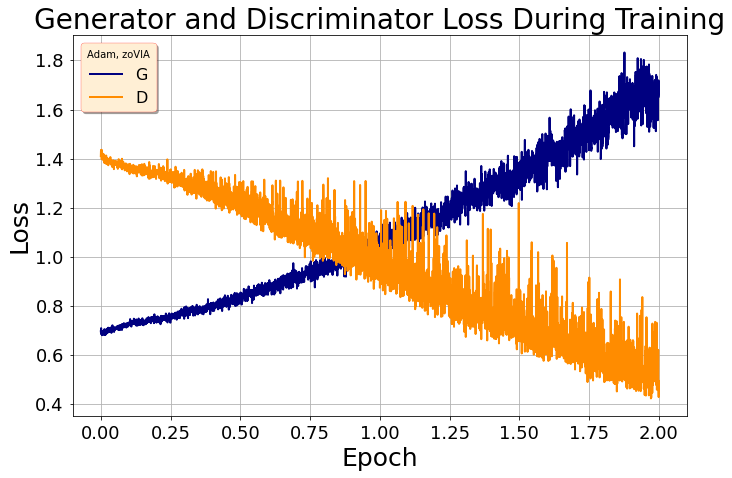

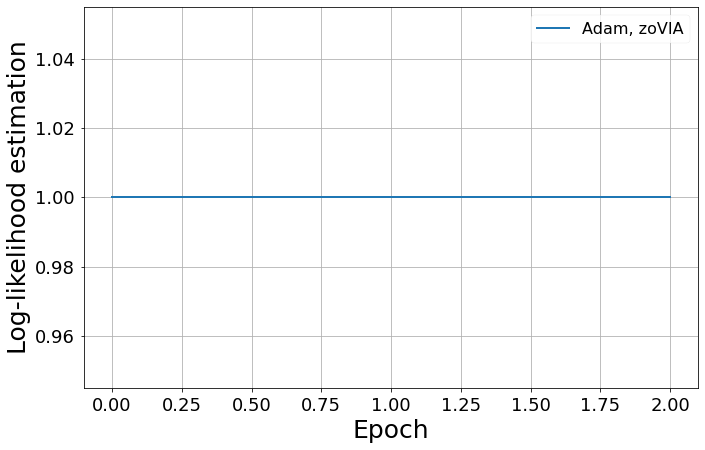

Model saved at ./experiments/gan_Adam_zoVIA_2ep.pickle
Control images for generator saved at ./experiments/imgs_Adam_zoVIA_2ep.pickle


In [2]:
optD, optG = 'Adam', 'zoVIA'
gan_adam_zovia, img_list_adam_zovia = main(optD, optG, num_epochs=2,
                                           discr_zo=False, gener_zo=True, save=True,
                                           tau=0.000001, lr_d=2e-4, lr_g=2e-3, batch_size=32,
                                           change_opt=(-1, -1, 'Adam', 'SGD', 2e-4, 2e-4),
                                           img_every_epoch=True, log_like=False)

In [ ]:
#from plot import *
#show_images(gan['netGenerator'].to(device).generate_samples(40))
#plot_losses(gan['generator_losses'], gan['discriminator_losses'], optD, optG, save=True)
#plot_ll(gan, optD, optG, save=True)

In [ ]:
#fig = plt.figure(figsize=(8,8))
#plt.axis("off")
#ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list_adam_adam]
#ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

#HTML(ani.to_jshtml())

In [ ]:
#with open('gan_Adam_RMSprop_10ep.pickle', 'rb') as handle:
#    gan_model_d100 = pickle.load(handle)